# Exploring und Plotting 2

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Time Series

**Lernziele:**
- Selbständig Daten explorieren und Storyideen testen

# Das Beispiel

Börsenkurse aller Bluechips-Firmen an der Schweizer Börse.

Korpus: https://www.six-group.com/exchanges/shares/explorer/swiss_blue_chips/closings_de.html

Die Daten stammen von dieser Quelle: https://finance.yahoo.com/ und wurden zu einem File kompiliert.

Kompilierungsfile: `dataprojects/Boersenkurse/Börsenkurse kompilieren.ipnyb`

Kompilierte Daten: `dataprojects/Boersenkurse/smi_members.csv`

## Vorbereitung

Entscheiden Sie selbst, welche Libraries Sie brauchen!

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

In [42]:
import numpy as np

In [43]:
from datetime import datetime

In [45]:
from datetime import timedelta

## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

Tipp: `index_col=0` verwenden.

In [82]:
df = pd.read_csv('dataprojects/Boersenkurse/smi_members.csv', index_col=0)

In [83]:
#df = pd.read_csv('dataprojects/Boersenkurse/smi_members.csv')

In [84]:

df.head()

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
2014-10-13,19.65,60.400002,NaN,NaN,15.54,23.689699,289.799988,1461.0,39.500000,117.300003,...,51.849998,143.899994,436.100006,211.899994,73.650002,531.5,32.000000,15.30,74.449997,279.000000
2014-10-14,19.76,60.700001,NaN,NaN,15.58,23.689699,294.399994,1478.0,39.770000,118.400002,...,52.716702,138.399994,435.299988,211.100006,73.050003,530.0,32.500000,15.33,75.000000,277.600006
2014-10-15,19.16,58.849998,NaN,NaN,15.16,22.817499,288.000000,1458.0,37.459999,115.900002,...,51.799999,134.600006,429.500000,205.699997,72.050003,515.5,32.200001,14.73,73.900002,270.399994
2014-10-16,19.26,59.500000,NaN,NaN,15.06,22.292299,288.000000,1466.0,37.509998,117.099998,...,51.783298,133.699997,431.500000,200.500000,71.050003,507.5,31.650000,14.50,72.849998,265.899994
2014-10-17,19.40,60.950001,NaN,NaN,15.38,22.751900,297.200012,1494.0,39.119999,117.500000,...,53.333302,138.399994,438.500000,208.500000,71.699997,515.5,32.500000,15.05,75.849998,271.899994


In [85]:
df.index =pd.to_datetime(df.index)

df.dtypes

ABB LTD               float64
ADECCO                float64
ALCON                 float64
AMS                   float64
CLARIANT              float64
CS GROUP              float64
GEBERIT               float64
GIVAUDAN              float64
JULIUS BAER           float64
KUEHNE+NAGEL INT      float64
LAFARGEHOLCIM         float64
LOGITECH              float64
LONZA                 float64
NESTLE                float64
NOVARTIS              float64
PARTNERS GROUP        float64
RICHEMONT             float64
ROCHE                 float64
SCHINDLER             float64
SGS                   float64
SIKA                  float64
SONOVA                float64
SWATCH GROUP          float64
SWISS LIFE HOLDING    float64
SWISS RE              float64
SWISSCOM              float64
TEMENOS               float64
UBS GROUP             float64
VIFOR                 float64
ZURICH INSURANCE      float64
dtype: object

In [87]:
#df['New Date'] = pd.to_datetime(df['Unnamed: 0'], format='%Y-%m-%d')
#df.dtypes

## Daten checken

**Länge, Spalten, Integrität**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2014-10-13 to 2019-10-11
Data columns (total 30 columns):
ABB LTD               1255 non-null float64
ADECCO                1255 non-null float64
ALCON                 123 non-null float64
AMS                   129 non-null float64
CLARIANT              1249 non-null float64
CS GROUP              1255 non-null float64
GEBERIT               1255 non-null float64
GIVAUDAN              1255 non-null float64
JULIUS BAER           1254 non-null float64
KUEHNE+NAGEL INT      1255 non-null float64
LAFARGEHOLCIM         1255 non-null float64
LOGITECH              129 non-null float64
LONZA                 1255 non-null float64
NESTLE                1255 non-null float64
NOVARTIS              1255 non-null float64
PARTNERS GROUP        1255 non-null float64
RICHEMONT             1255 non-null float64
ROCHE                 1255 non-null float64
SCHINDLER             1254 non-null float64
SGS                   1255 non-null float6

In [122]:
df_new = df['2019-04-08':][{'AMS','LOGITECH','ALCON'}]

In [123]:
df_new.head()

,ALCON,AMS,LOGITECH
2019-04-08,NaN,31.639999,40.430000
2019-04-09,NaN,32.279999,40.360001
2019-04-10,NaN,31.660000,40.959999
2019-04-11,NaN,31.700001,40.869999
2019-04-12,NaN,32.700001,41.240002


In [112]:
# Index als Datum
#df['New Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')
#values['name'] = values.index.strftime('%B - %Y')
#df['New Date'] = pd.to_datetime('index', format='%d.%m.%Y')

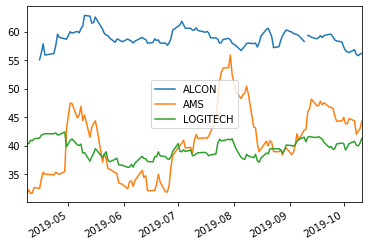

In [113]:
df_new.plot()

## Explorieren

Ihr Ziel ist, aus den Börsendaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Was sind mögliche interessante Fragen?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten!

In [114]:
df_new.pct_change().head()

,ALCON,AMS,LOGITECH
2019-04-08,NaN,NaN,NaN
2019-04-09,NaN,0.020228,-0.001731
2019-04-10,NaN,-0.019207,0.014866
2019-04-11,NaN,0.001263,-0.002197
2019-04-12,NaN,0.031546,0.009053


In [115]:
df_new.resample('MS').mean()

,ALCON,AMS,LOGITECH
2019-04-01,57.488000,34.388000,41.440666
2019-05-01,60.273333,40.956667,38.637620
2019-06-01,58.466315,33.751579,37.597895
2019-07-01,59.748261,44.531739,39.480001
2019-08-01,58.459524,42.734286,38.601429
2019-09-01,59.132000,44.630476,40.680476
2019-10-01,56.412222,43.736666,40.262222


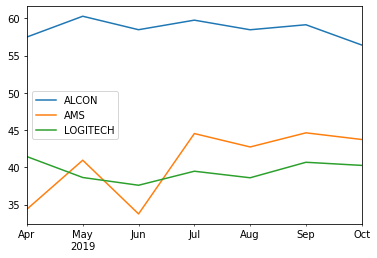

In [116]:
df_new.resample('MS').mean().plot()

In [117]:
df_new.resample('A').first()

,ALCON,AMS,LOGITECH
2019-12-31,55.080002,31.639999,40.43


In [118]:
df_new.resample('A').last()

,ALCON,AMS,LOGITECH
2019-12-31,56.200001,44.259998,41.299999


In [119]:
#Prozentuale Veränderung

df_new.resample('A').last()/df_new.resample('A').first()*100-100


,ALCON,AMS,LOGITECH
2019-12-31,2.033404,39.886218,2.151865


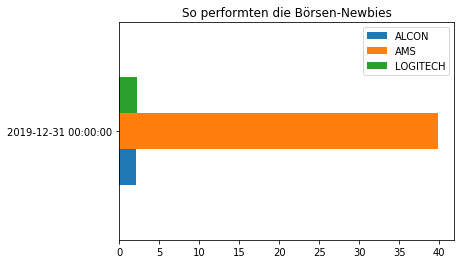

In [125]:
(df_new.resample('A').last()/df_new.resample('A').first()*100-100).plot(kind='barh', title ="So performten die Börsen-Newbies")

## Die Story
Wählen Sie eine ihrer Fragen aus, die Sie bearbeitet haben.
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren